# New Section

In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [6]:
!ls drive/Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt


%matplotlib inline

data = pd.read_csv("drive/Dataset/train.csv")
testdata = pd.read_csv("drive/Dataset/test.csv")
BS = pd.read_csv("drive/Dataset/Building_Structure.csv")
BO = pd.read_csv("drive/Dataset/Building_Ownership_Use.csv")
display(data)

Building_Ownership_Use.csv  Codefile.py  sample_submission.csv	visuals.py
Building_Structure.csv	    ReadMe.md	 test.csv		visuals.pyc
Codefile.ipynb		    result1.csv  train.csv


,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627
5,Exterior,1f54965821f,Grade 5,21,0.0,0,0,0,0,0,0,0,0.0,2153
6,Both,2beb42eaeee,Grade 2,30,1.0,0,0,0,1,0,0,1,0.0,3018
7,Both,25e8adfd09a,Grade 5,26,0.0,0,0,0,0,0,0,0,0.0,2605
8,Both,1e96b58fa58,Grade 1,21,0.0,0,0,0,0,0,0,0,NaN,2102
9,Both,392cbd772c9,Grade 3,39,0.0,0,0,0,0,0,0,0,1.0,3929


In [7]:
n_records = np.size(data,0)
print "Total Records {}".format(n_records)

dg1 = np.size(data[data['damage_grade'].str.match('Grade 1')],0)
print "Damage Grade-1: {}".format(dg1)

dg2 = np.size(data[data['damage_grade'].str.match('Grade 2')],0)
print "Damage Grade-2: {}".format(dg2)

dg3 = np.size(data[data['damage_grade'].str.match('Grade 3')],0)
print "Damage Grade-3: {}".format(dg3)

dg4 = np.size(data[data['damage_grade'].str.match('Grade 4')],0)
print "Damage Grade-4: {}".format(dg4)

dg5 = np.size(data[data['damage_grade'].str.match('Grade 5')],0)
print "Damage Grade-5: {}".format(dg5)



Total Records 631761
Damage Grade-1: 61320
Damage Grade-2: 85084
Damage Grade-3: 122288
Damage Grade-4: 152244
Damage Grade-5: 210825


In [0]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: ignored

In [8]:
from scipy import stats
merged = pd.merge(BO, BS, on = 'building_id')

merged_data = pd.merge(left = data, right = merged, how = 'left', on= 'building_id')
merged_test = pd.merge(left = testdata, right = merged, how = 'left', on= 'building_id')
print merged_data.isnull().sum()
print merged_test.shape[0]
print np.mean(merged_data[['count_families']], axis=0)
print np.mean(merged_data[['has_repair_started']], axis=0)
print np.mean(merged_test[['has_repair_started']], axis=0)

area_assesed                                  0
building_id                                   0
damage_grade                                  0
district_id                                   0
has_geotechnical_risk                         0
has_geotechnical_risk_fault_crack             0
has_geotechnical_risk_flood                   0
has_geotechnical_risk_land_settlement         0
has_geotechnical_risk_landslide               0
has_geotechnical_risk_liquefaction            0
has_geotechnical_risk_other                   0
has_geotechnical_risk_rock_fall               0
has_repair_started                        33417
vdcmun_id                                     0
district_id_x                                 0
vdcmun_id_x                                   0
ward_id_x                                     0
legal_ownership_status                        0
count_families                                1
has_secondary_use                             0
has_secondary_use_agriculture           

In [9]:
merged_data[['count_families']] = merged_data[['count_families']].fillna(0.984075)
merged_data[['has_repair_started']] = merged_data[['has_repair_started']].fillna(0.316076)
merged_test[['has_repair_started']] = merged_test[['has_repair_started']].fillna(0.31612)

print merged_data.isnull().sum()
print merged_test.isnull().sum()

dg_raw = merged_data['damage_grade']
dg_final = pd.DataFrame(dg_raw)
features_raw = merged_data.drop(['damage_grade','building_id'], axis=1)
features_int = pd.DataFrame(data = features_raw)
features_final = pd.get_dummies(features_int, columns=["area_assesed","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration","condition_post_eq","legal_ownership_status"])
#features_final = features_final.drop(['district_id_x','vdcmun_id_x', 'ward_id_x', 'district_id_y', 'vdcmun_id_y', 'ward_id_y', 'district_id', 'count_floors_post_eq','has_geotechnical_risk','has_secondary_use','count_floors_pre_eq'], axis =1)
testdata_raw = merged_test.fillna(2)
testdata_int = testdata_raw.drop(['building_id'], axis=1)
testdata_final = pd.get_dummies(testdata_int, columns=["area_assesed","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration","condition_post_eq","legal_ownership_status"])
#testdata_final = testdata_final.drop(['district_id_x', 'vdcmun_id_x', 'ward_id_x', 'district_id_y', 'vdcmun_id_y', 'ward_id_y', 'district_id', 'count_floors_post_eq','has_geotechnical_risk', 'has_secondary_use', 'count_floors_pre_eq'], axis =1)
                                                       
testdata_id = testdata_raw[['building_id']]
testdata_id = testdata_id.astype(str)


print features_final.shape
print testdata_final.shape
print dg_final.shape


area_assesed                              0
building_id                               0
damage_grade                              0
district_id                               0
has_geotechnical_risk                     0
has_geotechnical_risk_fault_crack         0
has_geotechnical_risk_flood               0
has_geotechnical_risk_land_settlement     0
has_geotechnical_risk_landslide           0
has_geotechnical_risk_liquefaction        0
has_geotechnical_risk_other               0
has_geotechnical_risk_rock_fall           0
has_repair_started                        0
vdcmun_id                                 0
district_id_x                             0
vdcmun_id_x                               0
ward_id_x                                 0
legal_ownership_status                    0
count_families                            0
has_secondary_use                         0
has_secondary_use_agriculture             0
has_secondary_use_hotel                   0
has_secondary_use_rental        

In [12]:
i =1

for feature in features_final.keys():
    df = pd.DataFrame()
    x = 0
    arr = []
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(features_final[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(features_final[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    tp1 = pd.DataFrame(features_final[~((features_final[feature] >= Q1 - step) & (features_final[feature] <= Q3 + step))])
   
    if tp1.index in arr:
      arr = arr
      
    else:
      arr = [tp1.index]
      
      
    i = 0    
    #display(features_final[~((features_final[feature] >= Q1 - step) & (features_final[feature] <= Q3 + step))])
    x = x + len(features_final[~((features_final[feature] >= Q1 - step) & (features_final[feature] <= Q3 + step))])
    #print x   
    
print tp1.shape

    
x = features_final.drop(features_final.index[arr])
print x.shape


(13453, 97)
(618308, 97)


In [13]:
dg_finale = dg_final.drop(dg_final.index[arr], axis= 0)

display(dg_finale)

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3
5,Grade 5
7,Grade 5
8,Grade 1
9,Grade 3
10,Grade 5


In [14]:
features_final = x.reset_index(drop = True)
dg_final = dg_finale.reset_index(drop = True)

display(features_final)
display(dg_final)

,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,...,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,legal_ownership_status_Institutional,legal_ownership_status_Other,legal_ownership_status_Private,legal_ownership_status_Public
0,24,0.0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,1,0
1,44,0.0,0,0,0,0,0,0,0,1.000000,...,1,0,0,0,0,0,0,0,1,0
2,36,0.0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,1,0,0,1,0
3,30,0.0,0,0,0,0,0,0,0,0.000000,...,0,0,1,0,0,0,0,0,1,0
4,36,0.0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,1,0,0,0,1,0
5,21,0.0,0,0,0,0,0,0,0,0.000000,...,0,0,0,1,0,0,0,0,1,0
6,26,0.0,0,0,0,0,0,0,0,0.000000,...,0,0,0,1,0,0,0,0,1,0
7,21,0.0,0,0,0,0,0,0,0,0.316076,...,0,0,0,0,0,1,0,0,1,0
8,39,0.0,0,0,0,0,0,0,0,1.000000,...,1,0,0,0,0,0,0,0,1,0
9,36,0.0,0,0,0,0,0,0,0,0.000000,...,0,0,0,1,0,0,0,0,1,0


,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3
5,Grade 5
6,Grade 5
7,Grade 1
8,Grade 3
9,Grade 5


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import RobustScaler as RS
from sklearn.preprocessing import Normalizer as NS
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

le = LabelEncoder()
labelencode = le.fit_transform(dg_final)
X_train, X_test, y_train, y_test = train_test_split(features_final, labelencode, test_size = 0.2, random_state= 40)



scaler = MMS()
X_train_scaled = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
testdata_final_scaled = scaler.transform(testdata_final)




#ss = ShuffleSplit(n_splits=10, test_size=0.25, random_state =42)
#x = ss.split(X_train, y_train)
#print x

print "Training set has {} points".format(X_train.shape[0])
print "Testing set has  {} points".format(X_test.shape[0])
display(y_test)
print X_train_scaled.shape


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set has 494646 points
Testing set has  123662 points


array([4, 0, 4, ..., 1, 4, 3])

(494646, 97)


Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


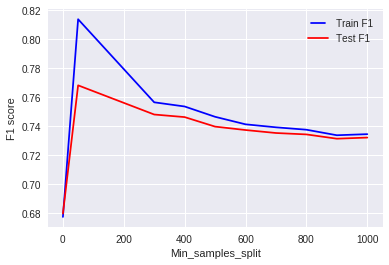

In [73]:
from sklearn.ensemble import RandomForestClassifier

min_samples_splits = [0.1, 50, 300,400,500,600,700,800,900,1000]
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   f1score = f1_score(y_train, train_pred, average = 'weighted')
   train_results.append(f1score)
   y_pred = rf.predict(X_test)
   f1score = f1_score(y_test, y_pred, average= 'weighted')
   test_results.append(f1score)
   print "Hello"
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train F1")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('Min_samples_split')
plt.show()

In [1]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train F1")
line2, = plt.plot(max_features, test_results, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('Min_samples_split')
plt.show()

NameError: ignored

In [169]:
def find_correlation(data, threshold, include_negative=False):
    """
    Given a numeric pd.DataFrame, this will find highly correlated features,
    and return a list of features to remove.
    Parameters
    -----------
    data : pandas DataFrame
        DataFrame
    threshold : float
        correlation threshold, will remove one of pairs of features with a
        correlation greater than this value.
    include_negative: Boolean
        If true then features which are highly negatively correlated will
        also be returned.
    Returns
    --------
    select_flat : list
        listof column names to be removed
    """
    corr_mat = data.corr()
    if include_negative:
        corr_mat = np.abs(corr_mat)
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][corr_mat[col] > threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat


find_correlation(merged_test, 0.99)



['district_id_x',
 'vdcmun_id_x',
 'ward_id_x',
 'district_id_y',
 'vdcmun_id_y',
 'ward_id_y',
 'district_id']

In [14]:
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [200, 300, 400, 500, 600]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 25, 35, 40, 45, 50, 60, 80]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 6, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


#min_samples_split=6, n_estimators= 300, bootstrap=True, max_features= 'sqrt', min_samples_leaf=2, max_depth=50, random_state =42

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4, 6], 'n_estimators': [200, 300, 400, 500, 600], 'min_samples_split': [2, 5, 6, 8, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 25, 35, 40, 45, 50, 60, 80]}


In [0]:
rf = RFC()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=4, random_state=42)
print "Fitting Randomized Search"
rf_random.fit(X_train_scaled, y_train)
print "Fitting Done!"

print rf_random.best_params_

Fitting Randomized Search
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=80, score=0.773671187016, total= 8.8min
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.9min remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=80, score=0.774705546997, total= 8.8min
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=80 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 19.9min remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=600, max_features=sqrt, min_samples_split=10, max_depth=80, score=0.775533721494, total= 8.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 29.9min remaining:    0.0s


[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=auto, min_samples_split=6, max_depth=45 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=auto, min_samples_split=6, max_depth=45, score=0.770092913806, total= 2.2min
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=auto, min_samples_split=6, max_depth=45 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=auto, min_samples_split=6, max_depth=45, score=0.771733724724, total= 2.2min
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=auto, min_samples_split=6, max_depth=45 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, max_features=auto, min_samples_split=6, max_depth=45, score=0.772476952935, total= 2.2min
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=600, max_features=auto, min_samples_split=8, max_depth=60 
[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=600, max_features=auto, min_samples_split=8

In [0]:
print rf_random.best_params_

In [34]:
from time import time
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor as DTC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.linear_model import LinearRegression as LNR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import ExtraTreesClassifier as ETC
import xgboost as xgb
from sklearn.metrics import make_scorer

score = accuracy_score

#def fit_model(X, y):
    
     #Create cross-validation sets from the training data
     #sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
     #sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
     
 #   cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
  #  clf = RFC(random_state = 42)
   # n_estimators = [50, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    # Number of features to consider at every split
    #max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
   # max_depth = [5, 10, 20, 30, 35, 40, 45, 50, 60, 65, 70, 75, 80, 85, 90, 100]

    # Minimum number of samples required to split a node
   # min_samples_split = [2, 5, 6, 8, 10, 14, 16, 20, 24]
    # Minimum number of samples required at each leaf node
   # min_samples_leaf = [2, 3, 4, 5, 6, 7, 8]
    # Method of selecting samples for training each tree
   # bootstrap = [True, False]
    # Create the random grid
   # params = {'n_estimators': n_estimators,
   #                'max_features': max_features,
   #                'max_depth': max_depth,
   #                'min_samples_split': min_samples_split,
   #                'min_samples_leaf': min_samples_leaf,
   #                'bootstrap': bootstrap}
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'loss':('hinge','log','perceptron','modified_huber'),'penalty':('l2','l1','elasticnet'),'alpha':(0.0001,0.001,0.01,0.1)}
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    #params = {'criterion':('gini','entropy'),'max_features':('sqrt','log2'),'min_samples_split':(2, 3),'class_weight':(None, 'balanced')}
    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    #grid = GridSearchCV(estimator=clf, param_grid=params, cv=cv_sets, scoring = scorer)

    # Fit the grid search object to the data to compute the optimal model
    #grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    #return grid.best_estimator_






print "Starting Clf.."
#knn = KNN(n_neighbors =30, weights = 'distance', n_jobs = 1)
#grid = GridSearchCV(estimator = clf, param_grid=params, cv = x)
print "Fitting Classifier.."
clf = xgb.XGBClassifier(max_depth=20)
#best parameter till now ...
#clf = RFC(min_samples_split=5, n_estimators= 300, bootstrap=True, max_features= 'sqrt', min_samples_leaf=2, max_depth=50, random_state =42)
#clf = RFC(bootstrap=False, min_samples_leaf=2, n_estimators=500, max_features='auto', min_samples_split=6, max_depth=40, random_state =42)
#clf = RFC(bootstrap=False, min_samples_leaf=6, n_estimators=300, max_features='auto', min_samples_split=8, max_depth=50)
#clf = RFC(min_samples_split=50, n_estimators= 400, bootstrap=False, max_features= 'auto', min_samples_leaf=2, max_depth=40, random_state =42)
#clf = RFC()
#clf = RFC(min_samples_split= 2, n_estimators= 600, bootstrap=False, max_features= 'sqrt', min_samples_leaf=4, max_depth=90, random_state =42)
clf.fit(X_train_scaled, y_train)
#reg = fit_model(X_train_scaled, y_train)
#reg = fit_model(X_train_scaled, y_train)
t1 = time()
print t1

print "Fitting Done"

#print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

#grid.fit(X_train, y_train)
#grid = grid.fit(X_train, y_train)
#print grid.best_estimator_





Starting Clf..
Fitting Classifier..
1532007061.25
Fitting Done


In [35]:

print "Predicting Classifier.."
#prediction = clf.predict(testdata_final)
#pred = pd.DataFrame(prediction)
#pred.columns = ['damage_grade']
#pred = clf.predict(testdata_final_scaled)
pred = clf.predict(X_test_scaled)
print "Prediction done"
t2 = time()
print t2

x = t2 -t1
print x
f1score = f1_score(y_test, pred, average = 'weighted')
print "F1 Score {}".format(f1score)
accuracyscore = accuracy_score(y_test, pred)
print "Accuracy Score {}".format(accuracyscore)

Predicting Classifier..
Prediction done
1532009133.3
2072.05411911
F1 Score 0.774782392344
Accuracy Score 0.77419093982


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [118]:
print "Predicting Classifier.."
#prediction = clf.predict(testdata_final)
#pred = pd.DataFrame(prediction)
#pred.columns = ['damage_grade']
pred = clf.predict(testdata_final_scaled)
#pred = clf.predict(X_test_scaled)
print "Prediction done"

Predicting Classifier..
Prediction done


In [119]:

pred = pd.DataFrame(pred)
#print pred.shape
pred1 = le.inverse_transform(pred)

df = pd.DataFrame(pred1)
df.columns = ['damage_grade']
display(df)
result = pd.concat([testdata_id, df], axis = 1)
display(testdata_id)
result.to_csv('rfcwitoutoutliers.csv', index= False)
print np.shape(testdata_id)
print np.shape(pred)
print np.shape(result)
display(result)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,damage_grade
0,Grade 4
1,Grade 5
2,Grade 5
3,Grade 3
4,Grade 5
5,Grade 3
6,Grade 3
7,Grade 5
8,Grade 3
9,Grade 4


,building_id
0,a3380c4f75
1,a338a4e653
2,a338a4e6b7
3,a33a6eaa3a
4,a33b073ff6
5,6604e4896c6
6,a33b07430f
7,a33c386cf3
8,a33c386ee7
9,a33c38700f


(421175, 1)
(421175, 1)
(421175, 2)


,building_id,damage_grade
0,a3380c4f75,Grade 4
1,a338a4e653,Grade 5
2,a338a4e6b7,Grade 5
3,a33a6eaa3a,Grade 3
4,a33b073ff6,Grade 5
5,6604e4896c6,Grade 3
6,a33b07430f,Grade 3
7,a33c386cf3,Grade 5
8,a33c386ee7,Grade 3
9,a33c38700f,Grade 4


In [0]:
from google.colab import files
files.download('rfcwitoutoutliers.csv')